# Tensorflow

### 'tf' Neural Network from scratch

Let's classify handwritten digits:

![alt text](images/mnistExamples.png)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


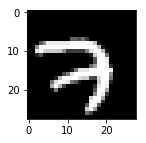

Class:  7


In [1]:
# Import MINST data
# The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 
# 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation).

# Both the training set and test set contain images and their corresponding labels; for example the 
# training images are mnist.train.images and the training labels are mnist.train.labels.

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

mnist = input_data.read_data_sets("data/", one_hot=True)

fig, ax = plt.subplots(figsize=(2, 2))
plt.imshow(mnist.train.images[0].reshape((28, 28)), 
           interpolation='nearest', 
           cmap='gray')
plt.show()

print "Class: ", np.argmax(mnist.train.labels[0])

In [2]:
tf.__version__

'1.2.0'

In [3]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input    = 784 # MNIST data input (img shape: 28*28)
n_classes  = 10  # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [4]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [5]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [6]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost)
    
    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

Epoch: 0001 cost= 198.601222456
Epoch: 0002 cost= 41.389123577
Epoch: 0003 cost= 25.807195734
Epoch: 0004 cost= 18.053279853
Epoch: 0005 cost= 13.306420709
Epoch: 0006 cost= 9.788150438
Epoch: 0007 cost= 7.338076357
Epoch: 0008 cost= 5.597470581
Epoch: 0009 cost= 4.148726688
Epoch: 0010 cost= 3.148515648
Epoch: 0011 cost= 2.468242544
Epoch: 0012 cost= 1.792525446
Epoch: 0013 cost= 1.458131538
Epoch: 0014 cost= 1.025351936
Epoch: 0015 cost= 0.981866687
Optimization Finished!
Accuracy: 0.9471
